In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os

path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

filenames = os.listdir(path)

csv_files = [f for f in filenames if f.endswith('.csv')]

file_path = os.path.join(path, csv_files[0])

df = pd.read_csv(file_path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()
print("--------------------------------------------------")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Churn
No     5174
Yes    1869
Name: count, dtype: int64


/tmp/ipython-input-2162458895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


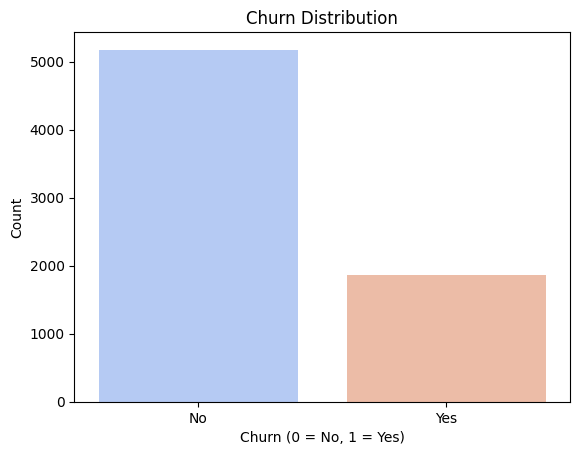

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).drop(['customerID'], axis=1).columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

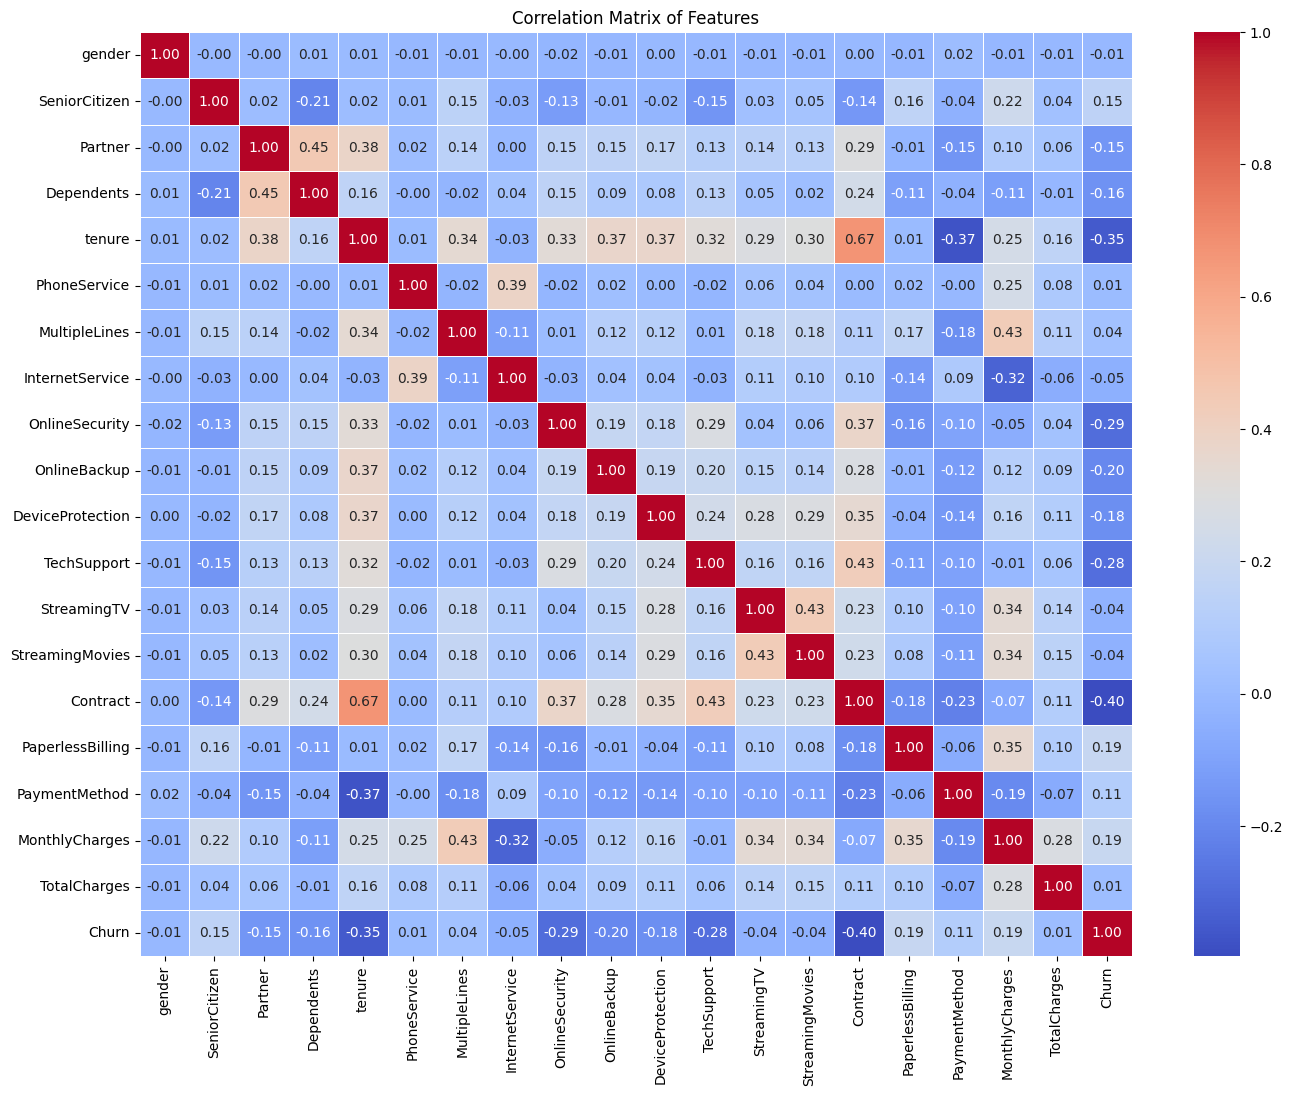

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = X.copy()
df_corr['Churn'] = y

plt.figure(figsize=(16, 12))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

median_total_charges_train = X_train['TotalCharges'].median()
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(median_total_charges_train)
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(median_total_charges_train)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.linspace(0.1, 1, 10),
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

random_search = RandomizedSearchCV(
  clf,
  param_grid,
  cv=5,
  n_iter=20,
  scoring='f1',
  random_state=42,
  n_jobs=-1
  )

random_search.fit(X, y)

print(f"Best hyperparameters found by RandomizedSearchCV: {random_search.best_params_}")

Best hyperparameters found by RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': np.float64(0.1), 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': True}


In [ ]:
clf = RandomForestClassifier(**random_search.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

Accuracy: 0.74
Precision: 0.51
Recall: 0.83
F1-score: 0.63
ROC-AUC Score: 0.86

Classification Report:

              precision    recall  f1-score   support

    No Churn       0.92      0.71      0.80      1036
       Churn       0.51      0.83      0.63       373

    accuracy                           0.74      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



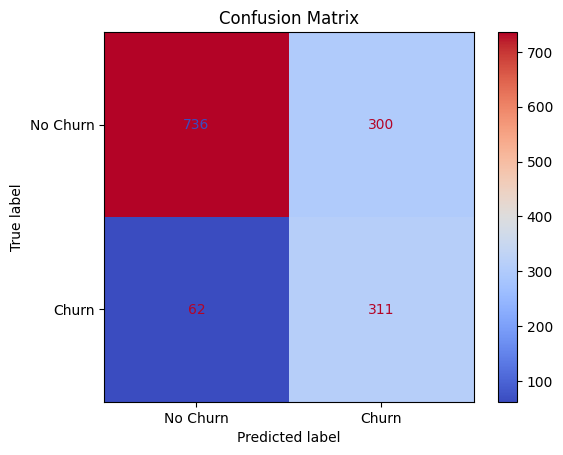

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()

/tmp/ipython-input-2909926664.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


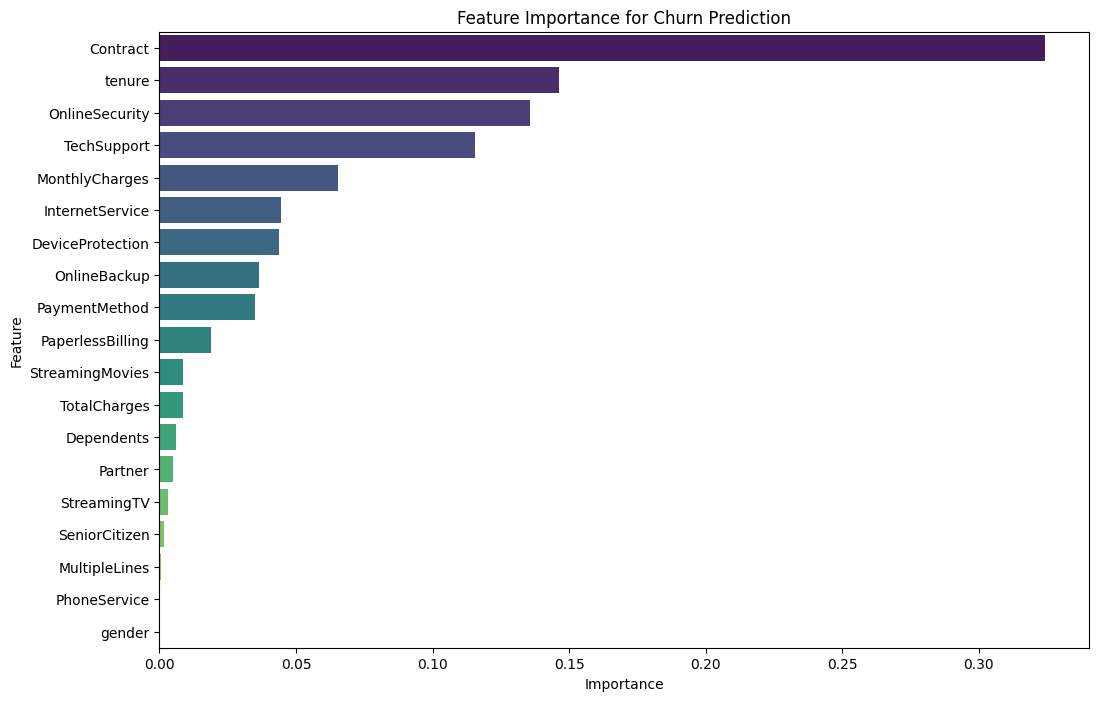

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = clf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##WITH SMOTE APPLIED




In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE: ", X_train.shape)
print("Shape of X_train after SMOTE: ", X_train_smote.shape)
print("Count of 'Churn' in y_train before SMOTE:\n", y_train.value_counts())
print("Count of 'Churn' in y_train after SMOTE:\n", y_train_smote.value_counts())

Shape of X_train before SMOTE:  (5634, 19)
Shape of X_train after SMOTE:  (8276, 19)
Count of 'Churn' in y_train before SMOTE:
 Churn
0    4138
1    1496
Name: count, dtype: int64
Count of 'Churn' in y_train after SMOTE:
 Churn
0    4138
1    4138
Name: count, dtype: int64


In [ ]:
clf_smote = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = clf_smote.predict(X_test)
y_proba_smote = clf_smote.predict_proba(X_test)[:, 1]

Accuracy (SMOTE): 0.79
Precision (SMOTE): 0.60
Recall (SMOTE): 0.61
F1-score (SMOTE): 0.60
ROC-AUC Score (SMOTE): 0.83

Classification Report (SMOTE):

              precision    recall  f1-score   support

    No Churn       0.86      0.85      0.86      1036
       Churn       0.60      0.61      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



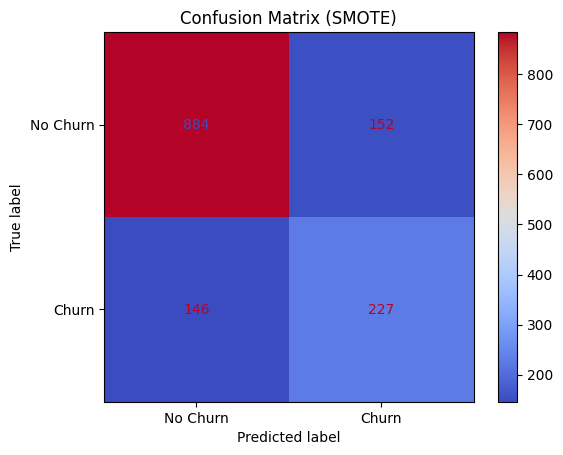

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_proba_smote)

print(f"Accuracy (SMOTE): {accuracy_smote:.2f}")
print(f"Precision (SMOTE): {precision_smote:.2f}")
print(f"Recall (SMOTE): {recall_smote:.2f}")
print(f"F1-score (SMOTE): {f1_smote:.2f}")
print(f"ROC-AUC Score (SMOTE): {roc_auc_smote:.2f}")

print("\nClassification Report (SMOTE):\n")
print(classification_report(y_test, y_pred_smote, target_names=["No Churn", "Churn"]))

cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=["No Churn", "Churn"])
disp_smote.plot(cmap="coolwarm")
plt.title('Confusion Matrix (SMOTE)')
plt.show()

### RandomSearchCV Hypertuning + SMOTE Oversampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

clf_tuned_smote = RandomForestClassifier(random_state=42)

random_search_smote = RandomizedSearchCV(
  clf_tuned_smote,
  param_grid,
  cv=5,
  n_iter=20,
  scoring='f1',
  random_state=42,
  n_jobs=-1
)

print("Starting RandomizedSearchCV for SMOTE-trained model...")
random_search_smote.fit(X_train_smote, y_train_smote)

print(f"Best hyperparameters found by RandomizedSearchCV (SMOTE): {random_search_smote.best_params_}")

clf_smote_optimized = RandomForestClassifier(**random_search_smote.best_params_, random_state=42)
clf_smote_optimized.fit(X_train_smote, y_train_smote)

y_pred_smote_optimized = clf_smote_optimized.predict(X_test)
y_proba_smote_optimized = clf_smote_optimized.predict_proba(X_test)[:, 1]

Starting RandomizedSearchCV for SMOTE-trained model...
Best hyperparameters found by RandomizedSearchCV (SMOTE): {'n_estimators': 50, 'min_samples_split': np.float64(0.1), 'min_samples_leaf': 2, 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': False}


Model Accuracy (SMOTE Optimized): 0.76
Precision (SMOTE Optimized): 0.54
Recall (SMOTE Optimized): 0.77
F1-score (SMOTE Optimized): 0.64
ROC-AUC Score (SMOTE Optimized): 0.85

Classification Report (SMOTE Optimized):

              precision    recall  f1-score   support

    No Churn       0.90      0.76      0.83      1036
       Churn       0.54      0.77      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.78      1409



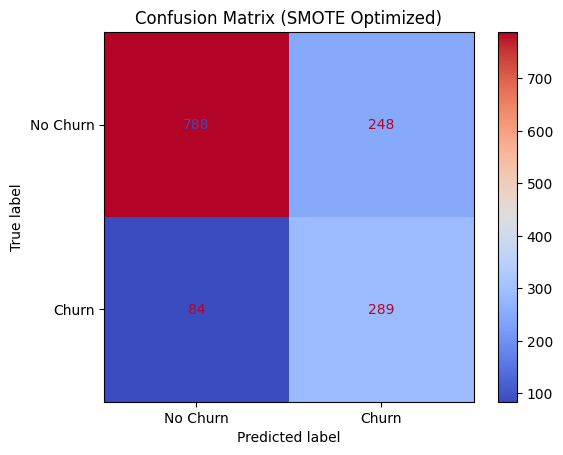

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy_smote_optimized = accuracy_score(y_test, y_pred_smote_optimized)
precision_smote_optimized = precision_score(y_test, y_pred_smote_optimized)
recall_smote_optimized = recall_score(y_test, y_pred_smote_optimized)
f1_smote_optimized = f1_score(y_test, y_pred_smote_optimized)
roc_auc_smote_optimized = roc_auc_score(y_test, y_proba_smote_optimized)

print(f"Model Accuracy (SMOTE Optimized): {accuracy_smote_optimized:.2f}")
print(f"Precision (SMOTE Optimized): {precision_smote_optimized:.2f}")
print(f"Recall (SMOTE Optimized): {recall_smote_optimized:.2f}")
print(f"F1-score (SMOTE Optimized): {f1_smote_optimized:.2f}")
print(f"ROC-AUC Score (SMOTE Optimized): {roc_auc_smote_optimized:.2f}")

print("\nClassification Report (SMOTE Optimized):\n")
print(classification_report(y_test, y_pred_smote_optimized, target_names=["No Churn", "Churn"]))

cm_smote_optimized = confusion_matrix(y_test, y_pred_smote_optimized)
disp_smote_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_smote_optimized, display_labels=["No Churn", "Churn"])
disp_smote_optimized.plot(cmap="coolwarm")
plt.title('Confusion Matrix (SMOTE Optimized)')
plt.show()


In [ ]:
metrics_summary = {}

metrics_summary['Hypertuned Model'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'ROC-AUC Score': roc_auc,
    'Churn_Precision': 0.52,
    'Churn_Recall': 0.83,
    'Churn_F1-score': 0.64
}

metrics_summary['SMOTE-Trained Model'] = {
    'Accuracy': accuracy_smote,
    'Precision': precision_smote,
    'Recall': recall_smote,
    'F1-score': f1_smote,
    'ROC-AUC Score': roc_auc_smote,
    'Churn_Precision': 0.60,
    'Churn_Recall': 0.61,
    'Churn_F1-score': 0.60
}

metrics_summary['Hypertuned + SMOTE Model'] = {
    'Accuracy': accuracy_smote_optimized,
    'Precision': precision_smote_optimized,
    'Recall': recall_smote_optimized,
    'F1-score': f1_smote_optimized,
    'ROC-AUC Score': roc_auc_smote_optimized,
    'Churn_Precision': 0.54,
    'Churn_Recall': 0.77,
    'Churn_F1-score': 0.64
}

import pandas as pd
metrics_df = pd.DataFrame.from_dict(metrics_summary, orient='index')
print("\n--- Model Performance Summary ---")
print(metrics_df.round(4))



--- Model Performance Summary ---
                          Accuracy  Precision  Recall  F1-score  \
Hypertuned Model            0.7431     0.5090  0.8338    0.6321   
SMOTE-Trained Model         0.7885     0.5989  0.6086    0.6037   
Hypertuned + SMOTE Model    0.7644     0.5382  0.7748    0.6352   

                          ROC-AUC Score  Churn_Precision  Churn_Recall  \
Hypertuned Model                 0.8556             0.52          0.83   
SMOTE-Trained Model              0.8325             0.60          0.61   
Hypertuned + SMOTE Model         0.8534             0.54          0.77   

                          Churn_F1-score  
Hypertuned Model                    0.64  
SMOTE-Trained Model                 0.60  
Hypertuned + SMOTE Model            0.64  


In [ ]:
df = pd.read_csv(file_path)

cat_cols = df.select_dtypes(include=['object']).drop(['customerID'], axis=1).columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

results_df = pd.DataFrame({
    'customerID': df.loc[y_test.index, 'customerID'],
    'Actual Churn': y_test,
    'Predicted Churn': y_pred_smote_optimized,
    'Churn Probability': y_proba_smote_optimized
})

low_risk_threshold = 0.3
medium_risk_threshold = 0.7

def assign_churn_risk_segment(prob):
    if prob < low_risk_threshold:
        return 'Low Risk'
    elif prob < medium_risk_threshold:
        return 'Medium Risk'
    else:
        return 'High Risk'

results_df['Churn Risk Segment'] = results_df['Churn Probability'].apply(assign_churn_risk_segment)

print("Customer Churn Segmentation Results (first 10 rows):")
display(results_df.head(10))

print("Distribution of Churn Risk Segments:")
display(results_df['Churn Risk Segment'].value_counts())

Customer Churn Segmentation Results (first 10 rows):


,customerID,Actual Churn,Predicted Churn,Churn Probability,Churn Risk Segment
185,1024-GUALD,1,1,0.728894,High Risk
2715,0484-JPBRU,0,0,0.266481,Low Risk
3825,3620-EHIMZ,0,0,0.075084,Low Risk
1807,6910-HADCM,1,1,0.769884,High Risk
132,8587-XYZSF,0,0,0.184019,Low Risk
1263,6818-WOBHJ,1,1,0.534020,Medium Risk
3732,3082-YVEKW,0,0,0.155469,Low Risk
1672,4737-AQCPU,0,0,0.078251,Low Risk
811,4853-RULSV,1,0,0.270232,Low Risk
2526,5766-ZJYBB,1,0,0.452527,Medium Risk


Distribution of Churn Risk Segments:


,count
Churn Risk Segment,
Medium Risk,648
Low Risk,539
High Risk,222


##MLFlow Install

In [ ]:
!pip install mlflow

In [ ]:
#Launch MLFlow UI Using GitBash

import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000/")

mlflow.set_experiment("Telco Churn Prediction")

with mlflow.start_run(run_name="FineTuned_SMOTE_RandomForest_Run") as run:

    mlflow.log_params(random_search_smote.best_params_)

    mlflow.log_metrics({
        "accuracy": accuracy_smote_optimized,
        "precision": precision_smote_optimized,
        "recall": recall_smote_optimized,
        "f1_score": f1_smote_optimized,
        "roc_auc": roc_auc_smote_optimized
    })

    mlflow.sklearn.log_model(clf_smote_optimized, "RF_Smote_Fine-Tuned")